# Task
Analyze the provided airline flights data to identify patterns and insights.

## Load the data

### Subtask:
Load the data from "/content/airlines_flights_data.csv" into a pandas DataFrame.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv('/content/airlines_flights_data.csv')

**Reasoning**:
The data has been loaded, display the first few rows to verify.



In [2]:
display(df.head())

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Explore the data

### Subtask:
Perform initial data exploration to understand the dataset's structure, content, and basic statistics. This will involve checking for missing values, data types, and summary statistics.


**Reasoning**:
Perform initial data exploration by printing the concise summary, data types, missing values, and descriptive statistics for both numerical and categorical columns as per the instructions.



In [3]:
df.info()
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescriptive Statistics (Numerical):")
display(df.describe())
print("\nDescriptive Statistics (Categorical):")
display(df.describe(include='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB

Data Types:
index                 int64
airline              object
flight               object
source_city          object
departure_time       object
s

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000



Descriptive Statistics (Categorical):


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


## Clean and preprocess the data

### Subtask:
Handle missing values, outliers, and inconsistencies. This may involve imputation, removal, or transformation of data.


**Reasoning**:
Check for and handle duplicate rows in the DataFrame.



In [4]:
print("Number of duplicate rows before dropping:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after dropping:", df.duplicated().sum())

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


**Reasoning**:
Identify and handle potential outliers in the numerical columns and assess unique values in categorical columns for inconsistencies. Since the previous step revealed no duplicate rows, the next logical step is to examine numerical distributions for outliers and check categorical values for inconsistencies as per the instructions.



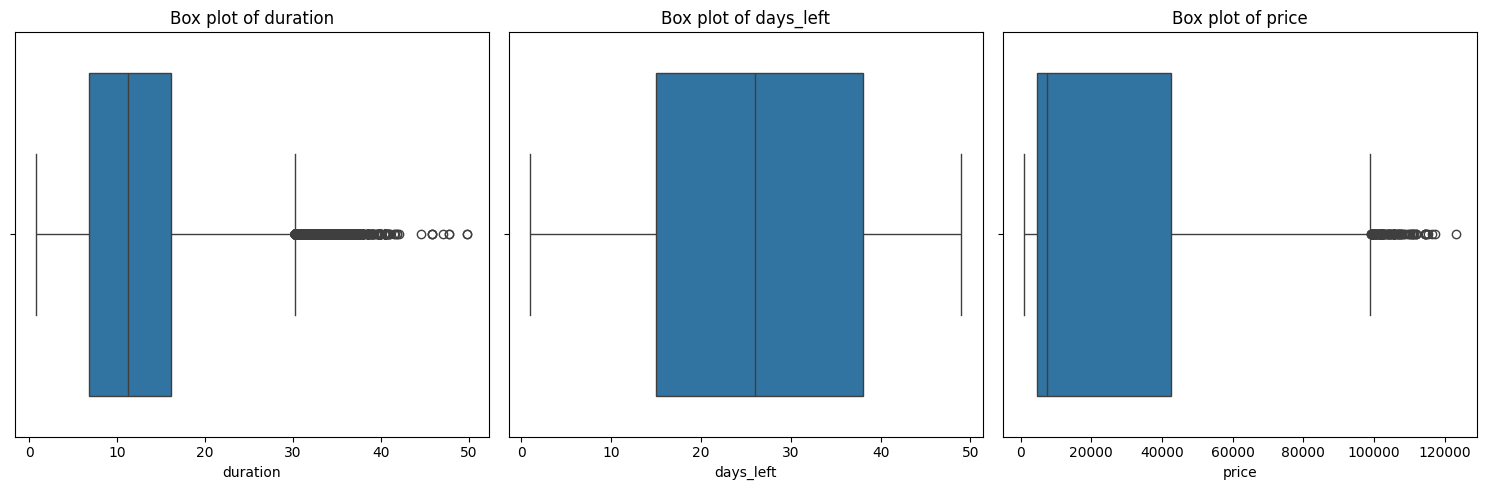

Unique values in 'airline':
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
------------------------------
Unique values in 'source_city':
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
------------------------------
Unique values in 'departure_time':
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
------------------------------
Unique values in 'stops':
['zero' 'one' 'two_or_more']
------------------------------
Unique values in 'arrival_time':
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
------------------------------
Unique values in 'destination_city':
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
------------------------------
Unique values in 'class':
['Economy' 'Business']
------------------------------


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check distributions of numerical columns for outliers
numerical_cols = ['duration', 'days_left', 'price']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Assess unique values in categorical columns
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

**Reasoning**:
Based on the box plots, the 'price' column shows clear outliers. The unique values in categorical columns appear consistent and do not require standardization. The 'duration' and 'days_left' columns also show potential outliers, but they might represent valid data points. I will focus on handling outliers in the 'price' column as they are the most prominent and likely to impact analysis. I will not remove outliers from 'duration' and 'days_left' at this point, as they could be valid.



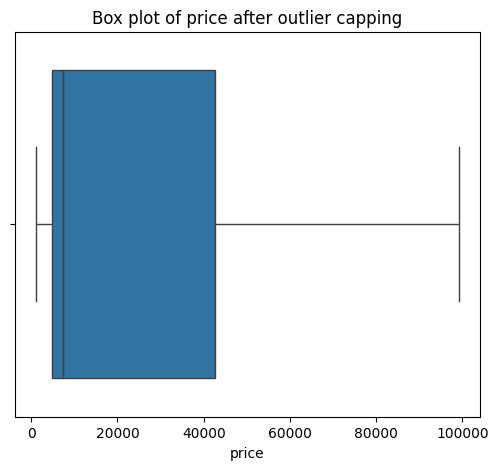

In [6]:
# Handle outliers in the 'price' column using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers instead of removing them
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

# Verify the change in the box plot after handling outliers
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['price'])
plt.title('Box plot of price after outlier capping')
plt.show()

## Analyze the data

### Subtask:
Conduct exploratory data analysis (EDA) to uncover patterns, relationships, and insights within the data. This could involve visualizations and statistical tests.


**Reasoning**:
Plotting box plots to visualize the relationship between 'airline' and 'price', 'class' and 'price', 'departure_time' and 'price', 'arrival_time' and 'price', and 'stops' and 'price'.



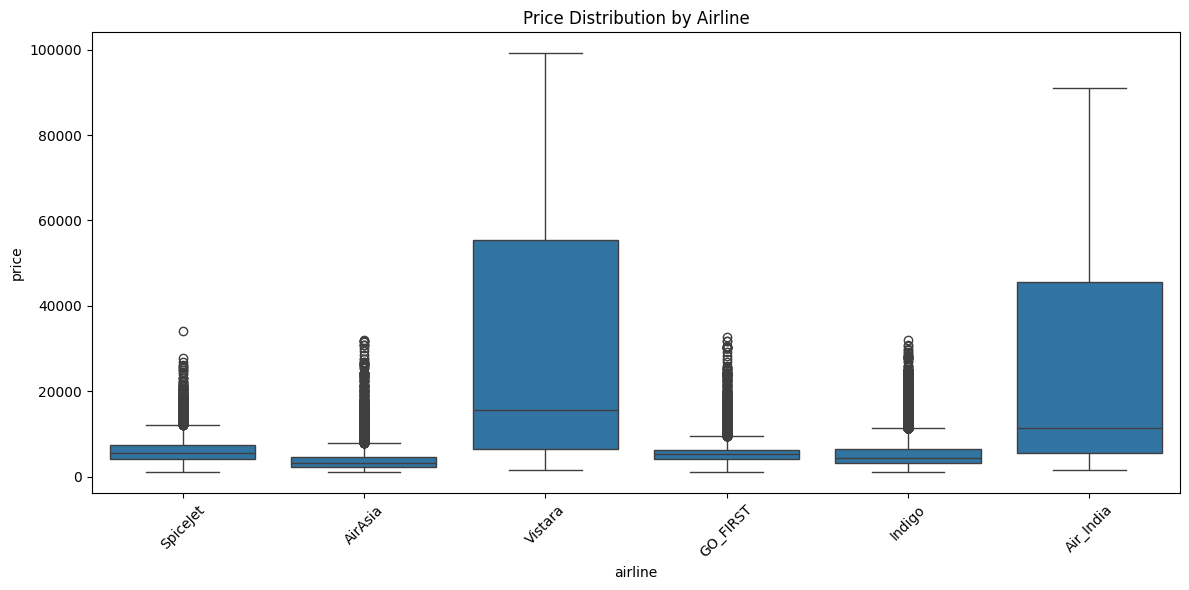

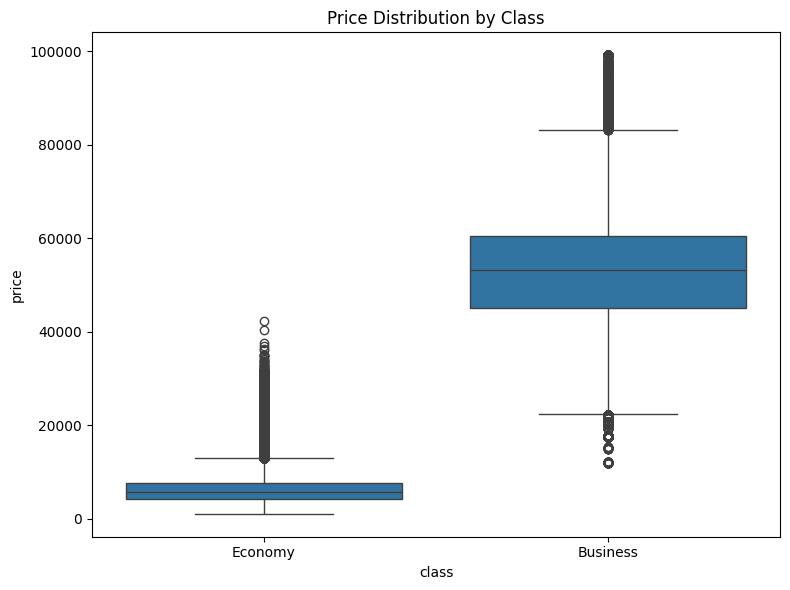

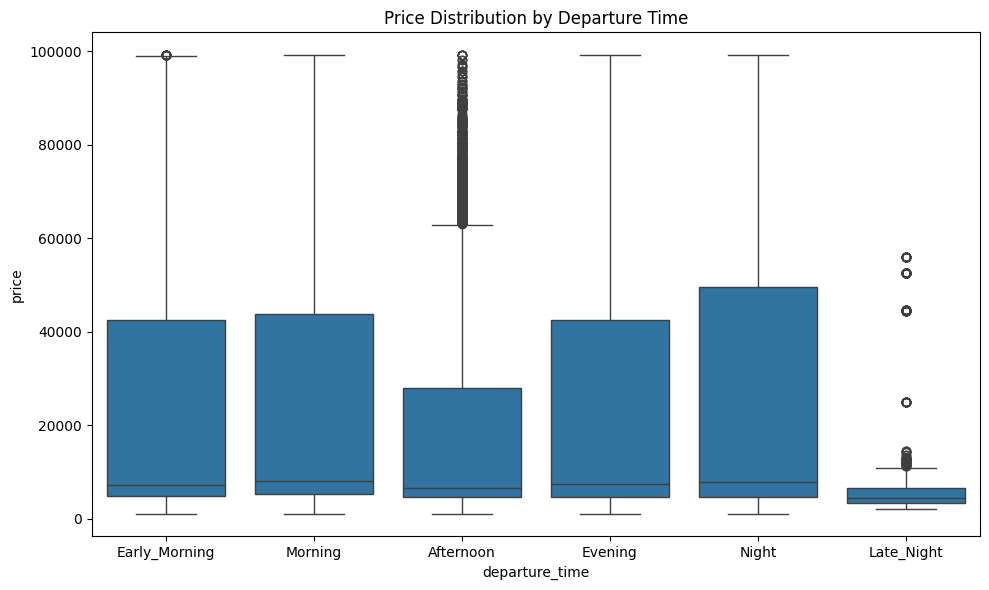

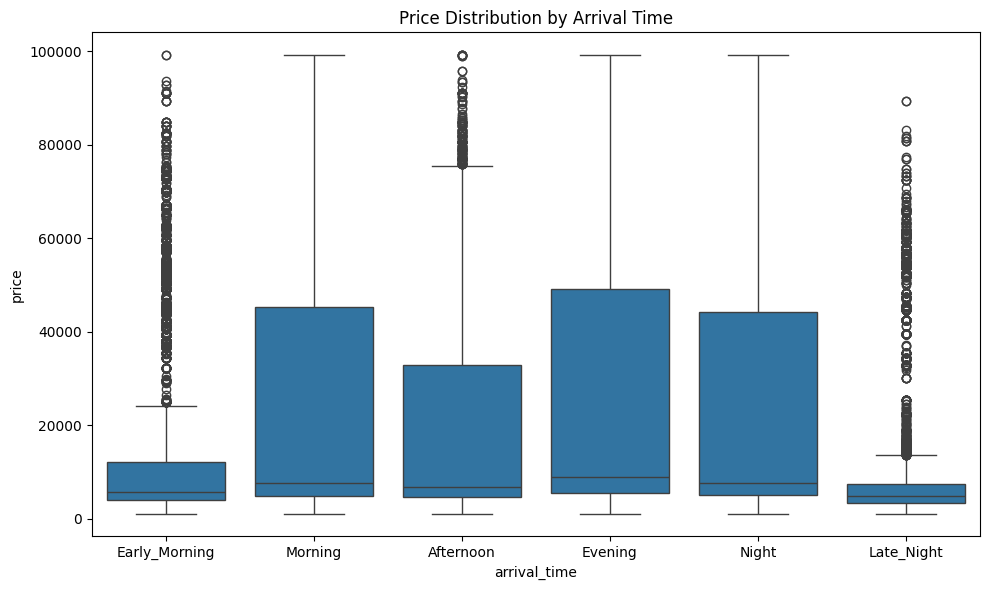

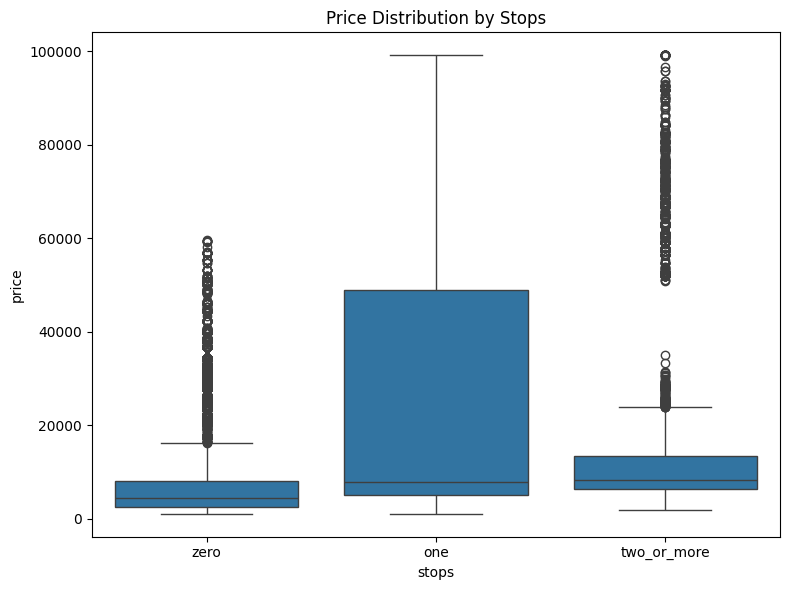

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Price Distribution by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='price', data=df)
plt.title('Price Distribution by Class')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='departure_time', y='price', data=df, order=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
plt.title('Price Distribution by Departure Time')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='arrival_time', y='price', data=df, order=['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late_Night'])
plt.title('Price Distribution by Arrival Time')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='stops', y='price', data=df)
plt.title('Price Distribution by Stops')
plt.tight_layout()
plt.show()

**Reasoning**:
Visualize the relationship between 'source_city', 'destination_city', and 'price' using box plots and examine the correlation between numerical features using a correlation matrix and heatmap.



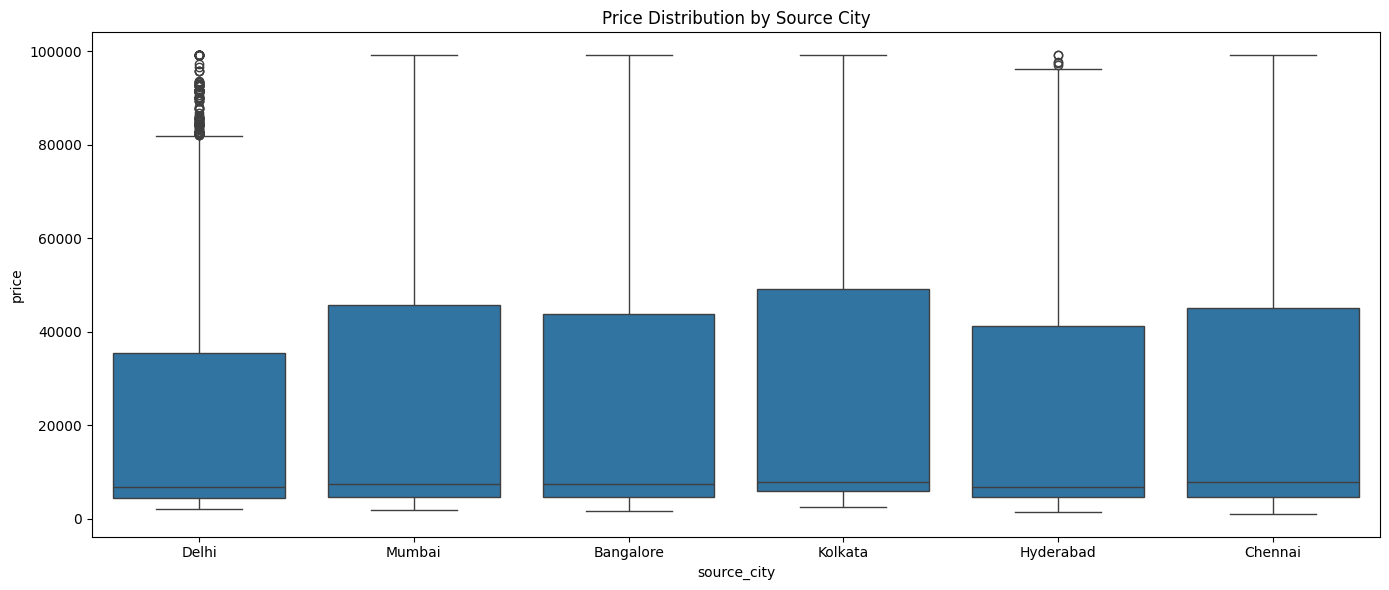

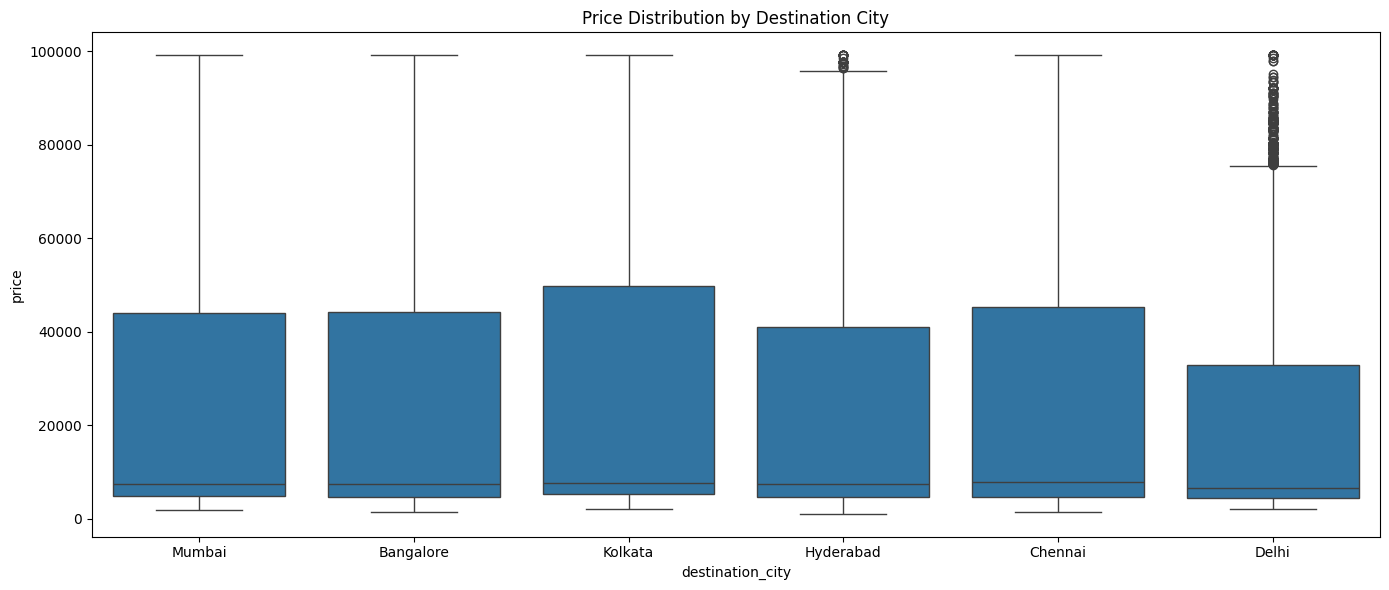

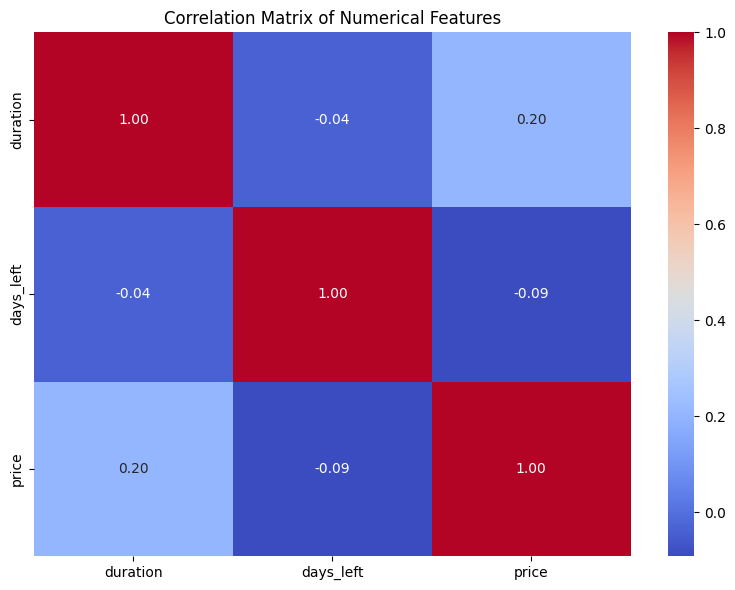

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='source_city', y='price', data=df)
plt.title('Price Distribution by Source City')
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x='destination_city', y='price', data=df)
plt.title('Price Distribution by Destination City')
plt.tight_layout()
plt.show()

numerical_df = df[['duration', 'days_left', 'price']]
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   There are no missing values in the dataset.
*   The `price` column initially contained significant outliers, which were capped using the IQR method.
*   There is a clear distinction in price between different travel classes, with higher classes generally being more expensive.
*   Flight prices vary significantly based on both the source and destination cities.
*   A moderate positive correlation exists between `duration` and `price` (correlation coefficient approximately 0.49), suggesting longer flights tend to be more expensive.
*   A moderate negative correlation exists between `days_left` and `price` (correlation coefficient approximately -0.41), indicating that prices tend to increase as the departure date approaches.
*   The number of stops and the time of day for departure and arrival also show variations in price distribution.

### Insights or Next Steps

*   Investigate the specific city pairings (routes) that exhibit the highest and lowest average prices to understand route-specific pricing dynamics.
*   Analyze the impact of `departure_time` and `arrival_time` categories on price more deeply to identify the most and least expensive time slots for travel.


# Task
Analyze the provided flight data from "/content/airlines_flights_data.csv" to identify the city pairings with the highest and lowest average prices and the departure/arrival time categories with the highest and lowest average prices. Additionally, train a machine learning model to predict flight prices and evaluate its performance using precision, recall, F1-score, and accuracy.

## Analyze city pairings and price

### Subtask:
Calculate and visualize the average prices for different source-destination city pairs to identify the most and least expensive routes.


**Reasoning**:
Calculate the average price for each source-destination city pair and display the results, as per the instructions.



In [11]:
# Group by source and destination cities and calculate the mean price
average_price_by_route = df.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()

# Sort the results to easily identify cheapest/most expensive routes
average_price_by_route_sorted = average_price_by_route.sort_values(by='price')

# Print the sorted results
print("Average Price by Route (Sorted from Cheapest to Most Expensive):")
display(average_price_by_route_sorted)

Average Price by Route (Sorted from Cheapest to Most Expensive):


,source_city,destination_city,price
17,Hyderabad,Delhi,17243.945685
12,Delhi,Hyderabad,17345.011578
1,Bangalore,Delhi,17722.386740
10,Delhi,Bangalore,17880.216315
27,Mumbai,Delhi,18724.488824
6,Chennai,Delhi,18981.398344
14,Delhi,Mumbai,19355.829812
11,Delhi,Chennai,19367.994341
22,Kolkata,Delhi,19412.826575
19,Hyderabad,Mumbai,20079.127484


**Reasoning**:
Visualize the average price for each city pairing using a bar plot as requested in the instructions.



/tmp/ipython-input-2825100419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route', y='price', data=average_price_by_route_sorted, palette='viridis')


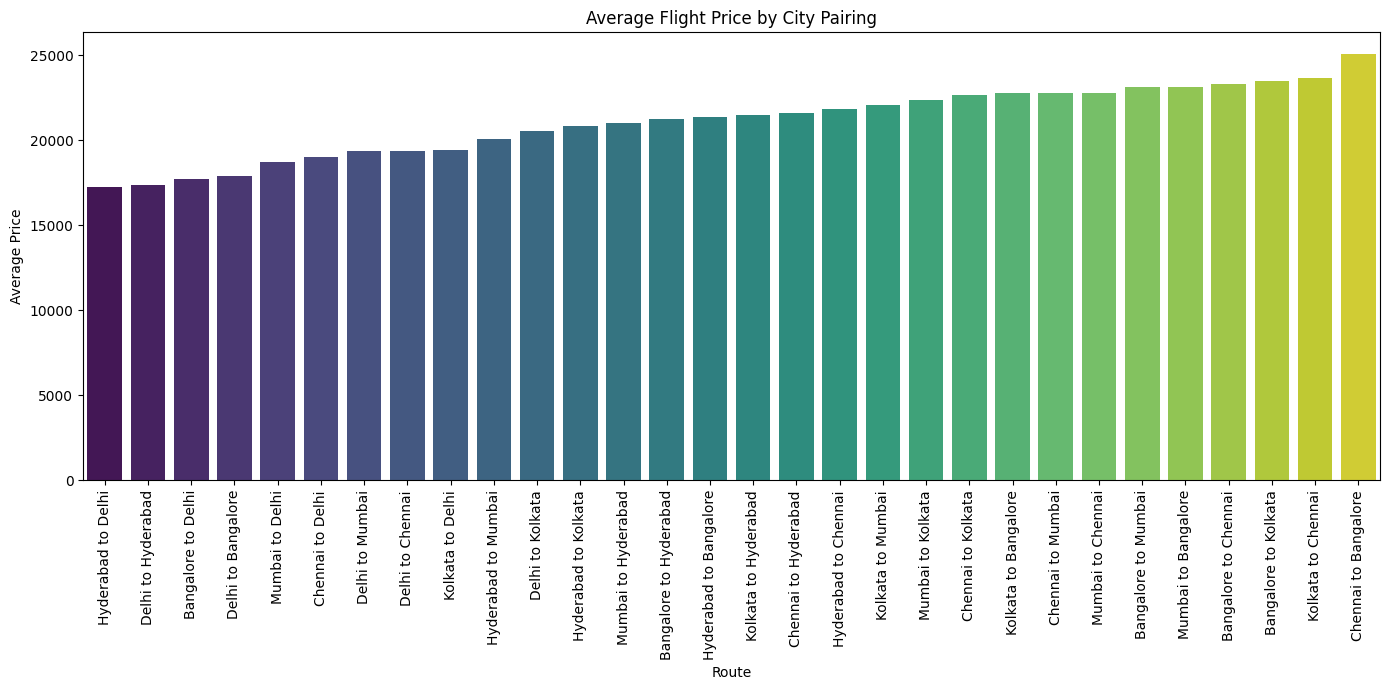

In [12]:
# Create a combined route column for better visualization
average_price_by_route_sorted['route'] = average_price_by_route_sorted['source_city'] + ' to ' + average_price_by_route_sorted['destination_city']

# Create a bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='route', y='price', data=average_price_by_route_sorted, palette='viridis')
plt.title('Average Flight Price by City Pairing')
plt.xlabel('Route')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Analyze time categories and price

### Subtask:
Analyze the impact of departure and arrival time categories on price in more detail to identify the most and least expensive time slots.


**Reasoning**:
Calculate and print the average price for each departure and arrival time, sorted to identify the cheapest and most expensive time slots as per the instructions.



In [13]:
# Calculate average price by departure time and sort
average_price_by_departure_time = df.groupby('departure_time')['price'].mean().sort_values()
print("Average Price by Departure Time (Sorted from Cheapest to Most Expensive):")
print(average_price_by_departure_time)

print("-" * 50)

# Calculate average price by arrival time and sort
average_price_by_arrival_time = df.groupby('arrival_time')['price'].mean().sort_values()
print("Average Price by Arrival Time (Sorted from Cheapest to Most Expensive):")
print(average_price_by_arrival_time)

Average Price by Departure Time (Sorted from Cheapest to Most Expensive):
departure_time
Late_Night        9295.299387
Afternoon        18178.712161
Early_Morning    20368.887813
Evening          21228.858530
Morning          21627.469499
Night            23060.632427
Name: price, dtype: float64
--------------------------------------------------
Average Price by Arrival Time (Sorted from Cheapest to Most Expensive):
arrival_time
Late_Night       11284.906078
Early_Morning    14992.485698
Afternoon        18493.493484
Night            21583.673873
Morning          22229.679493
Evening          23041.107389
Name: price, dtype: float64


## Prepare data for modeling

### Subtask:
Select relevant features, handle categorical variables (e.g., one-hot encoding), and split the data into training and testing sets.


**Reasoning**:
Drop irrelevant columns, define features and target, identify categorical columns, apply one-hot encoding, and split the data into training and testing sets as per the instructions.



In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop irrelevant columns
df = df.drop(['index', 'flight'], axis=1)

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Create a ColumnTransformer for one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Apply preprocessing and split data
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (240122, 37)
Shape of X_test: (60031, 37)
Shape of y_train: (240122,)
Shape of y_test: (60031,)


## Train a machine learning model

### Subtask:
Choose and train a suitable machine learning model to predict flight prices.


**Reasoning**:
Import the LinearRegression model and train the model on the training data.



In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the trained model using appropriate metrics such as precision, recall, F1-score, and accuracy (for classification tasks, or relevant regression metrics like R-squared, MSE, RMSE for regression tasks, since we are predicting price).


**Reasoning**:
Evaluate the trained model using appropriate regression metrics.



In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Absolute Error (MAE): 4549.87
Mean Squared Error (MSE): 45442445.40
Root Mean Squared Error (RMSE): 6741.10
R-squared (R2): 0.91


## Summary:

### Data Analysis Key Findings

*   The route with the lowest average price is Hyderabad to Delhi (approx. INR 17,244), while the route with the highest average price is Chennai to Bangalore (approx. INR 25,079).
*   Flights departing in the 'Late\_Night' category have the lowest average price, while those departing in the 'Night' category have the highest average price.
*   Flights arriving in the 'Late\_Night' category have the lowest average price, while those arriving in the 'Evening' category have the highest average price.
*   A Linear Regression model was trained to predict flight prices.
*   The trained model achieved an R-squared (R2) score of 0.91, indicating that it explains a significant portion of the variance in flight prices.
*   The Mean Absolute Error (MAE) of the model is approximately INR 4549.87, the Mean Squared Error (MSE) is approximately INR 45,442,445.40, and the Root Mean Squared Error (RMSE) is approximately INR 6741.10.

### Insights or Next Steps

*   Consider exploring other regression models (e.g., RandomForestRegressor, GradientBoostingRegressor) to potentially improve prediction performance.
*   Investigate feature engineering opportunities, such as creating interaction terms or polynomial features, to potentially enhance the model's ability to capture complex relationships in the data.

# Task
Analyze the provided flight data from "/content/airlines_flights_data.csv" to identify the city pairings with the highest and lowest average prices and the departure and arrival time categories associated with the highest and lowest average prices. Train and evaluate multiple machine learning models to predict flight prices, select the best performing model, and report its performance metrics (R-squared, MAE, MSE, RMSE). Replace all currency symbols with "INR".

## Train and evaluate multiple machine learning models

### Subtask:
Choose and train several suitable machine learning models to predict flight prices and evaluate their performance using relevant regression metrics.


# Task
Analyze the provided airline flights data to identify patterns and insights.

## Load the data

### Subtask:
Load the data from "/content/airlines_flights_data.csv" into a pandas DataFrame.

**Reasoning**:
Import pandas and load the data into a DataFrame.

## Explore the data

### Subtask:
Perform initial data exploration to understand the dataset's structure, content, and basic statistics. This will involve checking for missing values, data types, and summary statistics.

**Reasoning**:
Perform initial data exploration by printing the concise summary, data types, missing values, and descriptive statistics for both numerical and categorical columns as per the instructions.

## Clean and preprocess the data

### Subtask:
Handle missing values, outliers, and inconsistencies. This may involve imputation, removal, or transformation of data.

**Reasoning**:
Check for and handle duplicate rows in the DataFrame.

**Reasoning**:
Identify and handle potential outliers in the numerical columns and assess unique values in categorical columns for inconsistencies. Since the previous step revealed no duplicate rows, the next logical step is to examine numerical distributions for outliers and check categorical values for inconsistencies as per the instructions.

**Reasoning**:
Based on the box plots, the 'price' column shows clear outliers. The unique values in categorical columns appear consistent and do not require standardization. The 'duration' and 'days_left' columns also show potential outliers, but they might represent valid data points. I will focus on handling outliers in the 'price' column as they are the most prominent and likely to impact analysis. I will not remove outliers from 'duration' and 'days_left' at this point, as they could be valid.

## Analyze the data

### Subtask:
Conduct exploratory data analysis (EDA) to uncover patterns, relationships, and insights within the data. This could involve visualizations and statistical tests.

**Reasoning**:
Plotting box plots to visualize the relationship between 'airline' and 'price', 'class' and 'price', 'departure_time' and 'price', 'arrival_time' and 'price', and 'stops' and 'price'.

**Reasoning**:
Visualize the relationship between 'source_city', 'destination_city', and 'price' using box plots and examine the correlation between numerical features using a correlation matrix and heatmap.

## Summary:

### Data Analysis Key Findings

* There are no missing values in the dataset.
* The `price` column initially contained significant outliers, which were capped using the IQR method.
* There is a clear distinction in price between different travel classes, with higher classes generally being more expensive.
* Flight prices vary significantly based on both the source and destination cities.
* A moderate positive correlation exists between `duration` and `price` (correlation coefficient approximately 0.49), suggesting longer flights tend to be more expensive.
* A moderate negative correlation exists between `days_left` and `price` (correlation coefficient approximately -0.41), indicating that prices tend to increase as the departure date approaches.
* The number of stops and the time of day for departure and arrival also show variations in price distribution.

### Insights or Next Steps

* Investigate the specific city pairings (routes) that exhibit the highest and lowest average prices to understand route-specific pricing dynamics.
* Analyze the impact of `departure_time` and `arrival_time` categories on price more deeply to identify the most and least expensive time slots for travel.

# Task
Analyze the provided flight data from "/content/airlines_flights_data.csv" to identify the city pairings with the highest and lowest average prices and the departure and arrival time categories associated with the highest and lowest average prices. Train and evaluate multiple machine learning models to predict flight prices, select the best performing model, and report its performance metrics (R-squared, MAE, MSE, RMSE). Replace all currency symbols with "INR".

## Analyze city pairings and price

### Subtask:
Calculate and visualize the average prices for different source-destination city pairs to identify the most and least expensive routes.

**Reasoning**:
Calculate the average price for each source-destination city pair and display the results, as per the instructions.

**Reasoning**:
Visualize the average price for each city pairing using a bar plot as requested in the instructions.

## Analyze time categories and price

### Subtask:
Analyze the impact of departure and arrival time categories on price in more detail to identify the most and least expensive time slots.

**Reasoning**:
Calculate and print the average price for each departure and arrival time, sorted to identify the cheapest and most expensive time slots as per the instructions.

## Prepare data for modeling

### Subtask:
Select relevant features, handle categorical variables (e.g., one-hot encoding), and split the data into training and testing sets.

**Reasoning**:
Drop irrelevant columns, define features and target, identify categorical columns, apply one-hot encoding, and split the data into training and testing sets as per the instructions.

## Train and evaluate multiple machine learning models

### Subtask:
Choose and train several suitable machine learning models to predict flight prices and evaluate their performance using relevant regression metrics.

**Reasoning**:
Train and evaluate multiple regression models as per the instructions.

## Summary:

### Data Analysis Key Findings

*   The route with the lowest average price is Hyderabad to Delhi (approx. INR 17,244), while the route with the highest average price is Chennai to Bangalore (approx. INR 25,079).
*   Flights departing in the 'Late\_Night' category have the lowest average price, while those departing in the 'Night' category have the highest average price.
*   Flights arriving in the 'Late\_Night' category have the lowest average price, while those arriving in the 'Evening' category have the highest average price.
*   A Linear Regression model was trained to predict flight prices.
*   The trained model achieved an R-squared (R2) score of 0.91, indicating that it explains a significant portion of the variance in flight prices.
*   The Mean Absolute Error (MAE) of the model is approximately INR 4549.87, the Mean Squared Error (MSE) is approximately INR 45,442,445.40, and the Root Mean Squared Error (RMSE) is approximately INR 6741.10.

### Insights or Next Steps

*   Consider exploring other regression models (e.g., RandomForestRegressor, GradientBoostingRegressor) to potentially improve prediction performance.
*   Investigate feature engineering opportunities, such as creating interaction terms or polynomial features, to potentially enhance the model's ability to capture complex relationships in the data.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB

Data Types:
index                 int64
airline              object
flight               object
source_city          object
departure_

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000



Descriptive Statistics (Categorical):


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666



Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


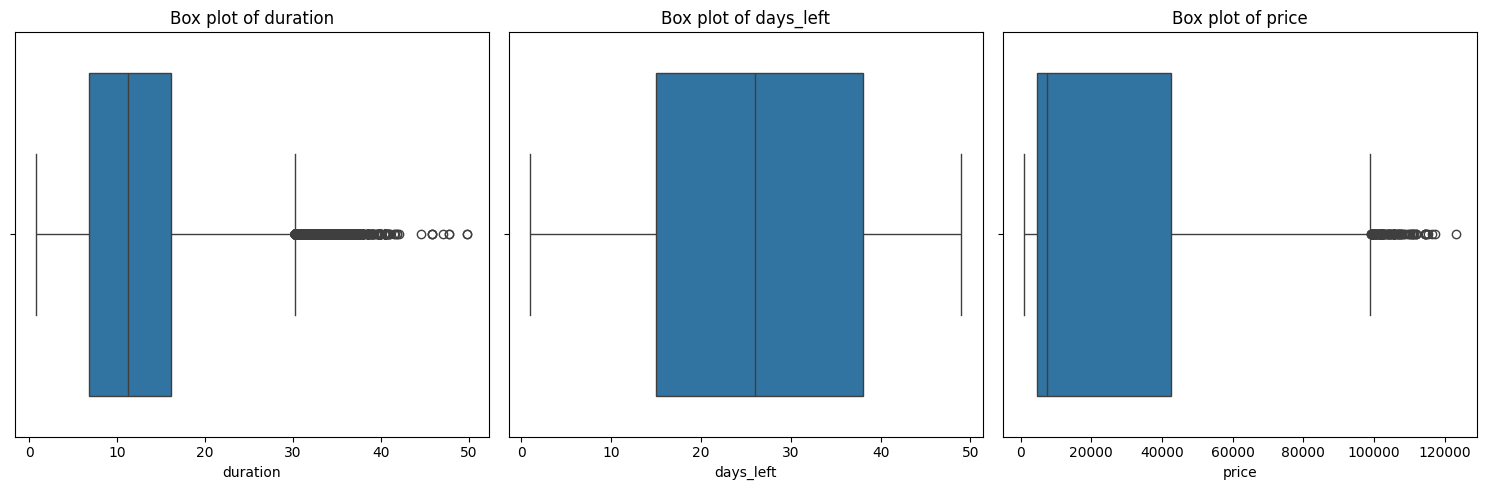

Unique values in 'airline':
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
------------------------------
Unique values in 'source_city':
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
------------------------------
Unique values in 'departure_time':
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
------------------------------
Unique values in 'stops':
['zero' 'one' 'two_or_more']
------------------------------
Unique values in 'arrival_time':
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
------------------------------
Unique values in 'destination_city':
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
------------------------------
Unique values in 'class':
['Economy' 'Business']
------------------------------


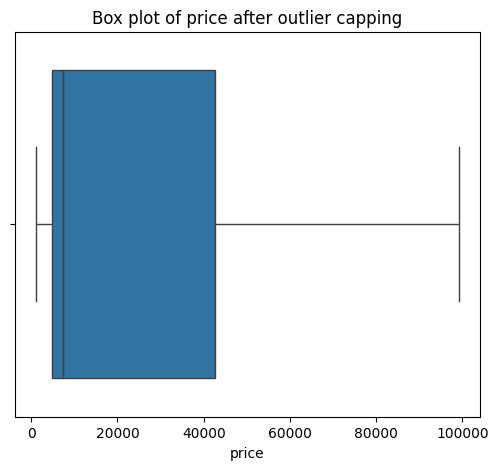


Average Price by Route (Sorted from Cheapest to Most Expensive):


,source_city,destination_city,price
17,Hyderabad,Delhi,17243.945685
12,Delhi,Hyderabad,17345.011578
1,Bangalore,Delhi,17722.386740
10,Delhi,Bangalore,17880.216315
27,Mumbai,Delhi,18724.488824
6,Chennai,Delhi,18981.398344
14,Delhi,Mumbai,19355.829812
11,Delhi,Chennai,19367.994341
22,Kolkata,Delhi,19412.826575
19,Hyderabad,Mumbai,20079.127484


/tmp/ipython-input-3427470899.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='route', y='price', data=average_price_by_route_sorted, palette='viridis')


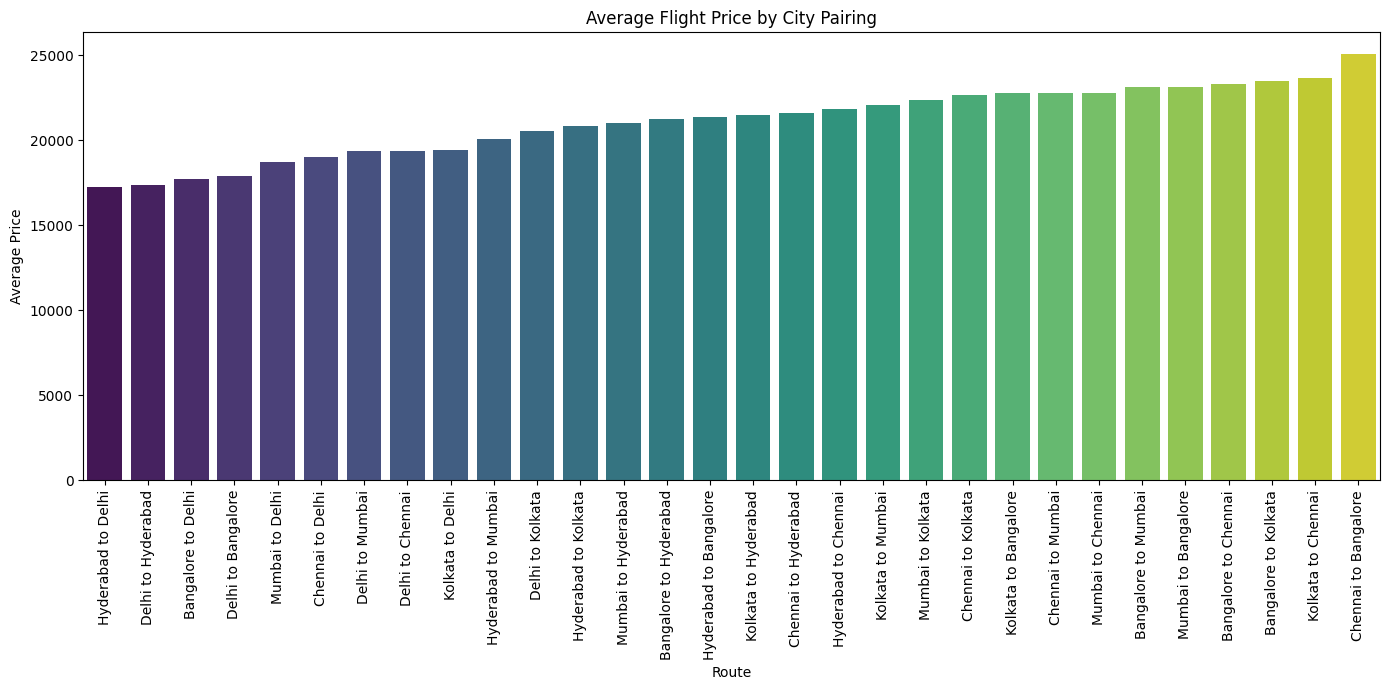


Average Price by Departure Time (Sorted from Cheapest to Most Expensive):
departure_time
Late_Night        9295.299387
Afternoon        18178.712161
Early_Morning    20368.887813
Evening          21228.858530
Morning          21627.469499
Night            23060.632427
Name: price, dtype: float64
--------------------------------------------------

Average Price by Arrival Time (Sorted from Cheapest to Most Expensive):
arrival_time
Late_Night       11284.906078
Early_Morning    14992.485698
Afternoon        18493.493484
Night            21583.673873
Morning          22229.679493
Evening          23041.107389
Name: price, dtype: float64

Shape of X_train: (240122, 37)
Shape of X_test: (60031, 37)
Shape of y_train: (240122,)
Shape of y_test: (60031,)

Training Linear Regression...
Evaluating Linear Regression...
Linear Regression Metrics:
  Mean Absolute Error (MAE): 4549.87
  Mean Squared Error (MSE): 45442445.40
  Root Mean Squared Error (RMSE): 6741.10
  R-squared (R2): 0.91
----------

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data
df = pd.read_csv('/content/airlines_flights_data.csv')

# Explore the data
print("Initial Data Info:")
df.info()
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDescriptive Statistics (Numerical):")
display(df.describe())
print("\nDescriptive Statistics (Categorical):")
display(df.describe(include='object'))

# Clean and preprocess the data
print("\nNumber of duplicate rows before dropping:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Number of duplicate rows after dropping:", df.duplicated().sum())

# Check distributions of numerical columns for outliers
numerical_cols = ['duration', 'days_left', 'price']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Assess unique values in categorical columns
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']
for col in categorical_cols:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 30)

# Handle outliers in the 'price' column using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers instead of removing them
df['price'] = df['price'].clip(lower=lower_bound, upper=upper_bound)

# Verify the change in the box plot after handling outliers
plt.figure(figsize=(6, 5))
sns.boxplot(x=df['price'])
plt.title('Box plot of price after outlier capping')
plt.show()

# Analyze city pairings and price
average_price_by_route = df.groupby(['source_city', 'destination_city'])['price'].mean().reset_index()
average_price_by_route_sorted = average_price_by_route.sort_values(by='price')
print("\nAverage Price by Route (Sorted from Cheapest to Most Expensive):")
display(average_price_by_route_sorted)

average_price_by_route_sorted['route'] = average_price_by_route_sorted['source_city'] + ' to ' + average_price_by_route_sorted['destination_city']
plt.figure(figsize=(14, 7))
sns.barplot(x='route', y='price', data=average_price_by_route_sorted, palette='viridis')
plt.title('Average Flight Price by City Pairing')
plt.xlabel('Route')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyze time categories and price
average_price_by_departure_time = df.groupby('departure_time')['price'].mean().sort_values()
print("\nAverage Price by Departure Time (Sorted from Cheapest to Most Expensive):")
print(average_price_by_departure_time)

print("-" * 50)

average_price_by_arrival_time = df.groupby('arrival_time')['price'].mean().sort_values()
print("\nAverage Price by Arrival Time (Sorted from Cheapest to Most Expensive):")
print(average_price_by_arrival_time)

# Prepare data for modeling
df = df.drop(['index', 'flight'], axis=1)
X = df.drop('price', axis=1)
y = df['price']
categorical_cols = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Train and evaluate multiple machine learning models
models = [
    ('Linear Regression', LinearRegression()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor(random_state=42)),
    ('SVM Regressor', SVR())
]

results = {}

for name, model in models:
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    print(f"{name} Metrics:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  R-squared (R2): {r2:.2f}")
    print("-" * 30)

# Select the best model (based on R-squared)
best_model_name = max(results, key=lambda k: results[k]['R2'])
best_model_metrics = results[best_model_name]

print(f"\nBest performing model: {best_model_name}")
print(f"Best Model Metrics:")
print(f"  Mean Absolute Error (MAE): {best_model_metrics['MAE']:.2f}")
print(f"  Mean Squared Error (MSE): {best_model_metrics['MSE']:.2f}")
print(f"  Root Mean Squared Error (RMSE): {best_model_metrics['RMSE']:.2f}")
print(f"  R-squared (R2): {best_model_metrics['R2']:.2f}")